We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## 1. Problem Definition
In a statement, Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

- **age** – Age in years  
- **sex** – Biological sex  
  - `1`: Male  
  - `0`: Female  
- **cp** – Chest pain type  
  - `0`: Typical angina – chest pain related to decreased blood supply to the heart  
  - `1`: Atypical angina – chest pain not related to the heart  
  - `2`: Non-anginal pain – typically esophageal spasms (non-heart related)  
  - `3`: Asymptomatic – chest pain not showing signs of disease  
- **trestbps** – Resting blood pressure (in mm Hg on admission to the hospital)  
  - Anything above 130–140 is typically cause for concern  
- **chol** – Serum cholesterol in mg/dl  
  - Calculated as: `serum = LDL + HDL + 0.2 * triglycerides`  
  - Above 200 is a cause for concern  
- **fbs** – Fasting blood sugar > 120 mg/dl  
  - `1`: True  
  - `0`: False  
  - `>126 mg/dL` signals diabetes  
- **restecg** – Resting electrocardiographic results  
  - `0`: Nothing to note  
  - `1`: ST-T Wave abnormality  
    - Can range from mild symptoms to severe problems  
    - Signals non-normal heartbeat  
  - `2`: Possible or definite left ventricular hypertrophy  
    - Indicates an enlarged heart’s main pumping chamber  
- **thalach** – Maximum heart rate achieved  
- **exang** – Exercise-induced angina  
  - `1`: Yes  
  - `0`: No  
- **oldpeak** – ST depression induced by exercise relative to rest  
  - Measures stress of the heart during exercise  
  - Unhealthy hearts will show more stress  
- **slope** – Slope of the peak exercise ST segment  
  - `0`: Upsloping – better heart rate with exercise (uncommon)  
  - `1`: Flat – minimal change (typical of a healthy heart)  
  - `2`: Downsloping – signs of an unhealthy heart  
- **ca** – Number of major vessels (0–3) colored by fluoroscopy  
  - Colored vessel = blood flow is visible to the doctor  
  - More visible blood flow = better (indicates no clots)  
- **thal** – Thalium stress test result  
  - `1`, `3`: Normal  
  - `6`: Fixed defect – was a defect, but now resolved  
  - `7`: Reversible defect – indicates improper blood movement during exercise  
- **target** – Presence of heart disease  
  - `1`: Yes  
  - `0`: No (this is the predicted attribute)  


In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

## Exploratory Data Analysis (EDA)
- The goal here is to find about explore the features and how the data is.
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how we deal with it?
4. Where are the outlier and why and how we deal with it?
5. How can we add, remove or change the provided data to get something from it?


In [5]:
data.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

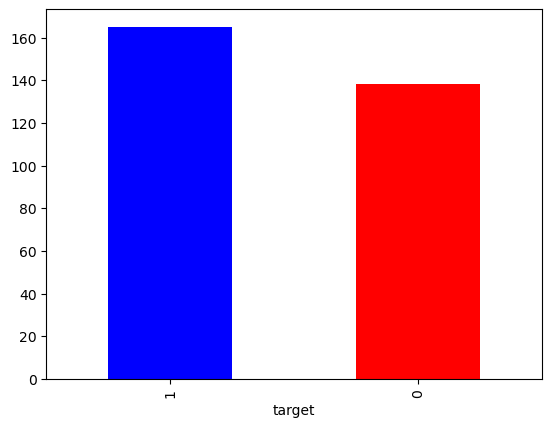

In [8]:
data.target.value_counts().plot(kind="bar", color=["blue","red"])

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

- in the above result "1" is male and "0" is female. So we have 207 record which are male and 96 records which are female.

In [11]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
import matplotlib.pyplot as plt

Age vs Max Heart Rate (Thalach)

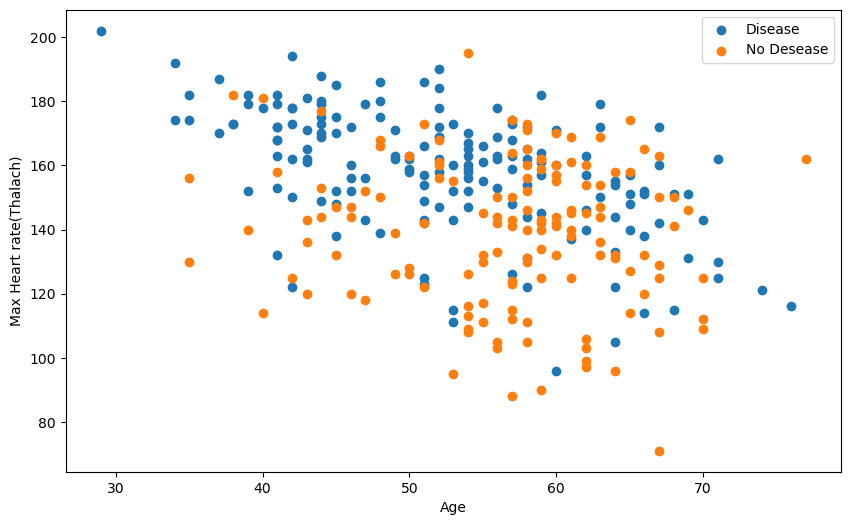

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data.target==1], data.thalach[data.target==1])
plt.scatter(data.age[data.target==0], data.thalach[data.target==0])
plt.xlabel("Age")
plt.ylabel("Max Heart rate(Thalach)")
plt.legend(["Disease", "No Desease"])

So from the plot at somewhat we can say that person's maximum heart rate decreases as he/she age.

## Let's check the distribution of some of the features.

<Axes: ylabel='Frequency'>

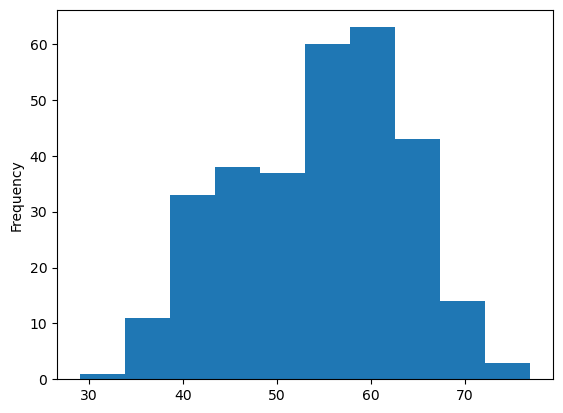

In [14]:
data.age.plot.hist()

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='Frequency'>

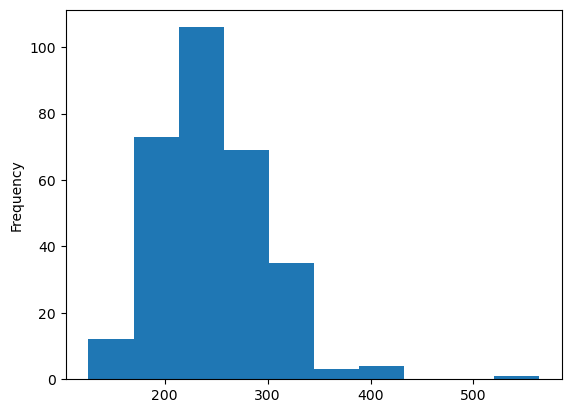

In [16]:
data.chol.plot.hist()

<Axes: ylabel='Frequency'>

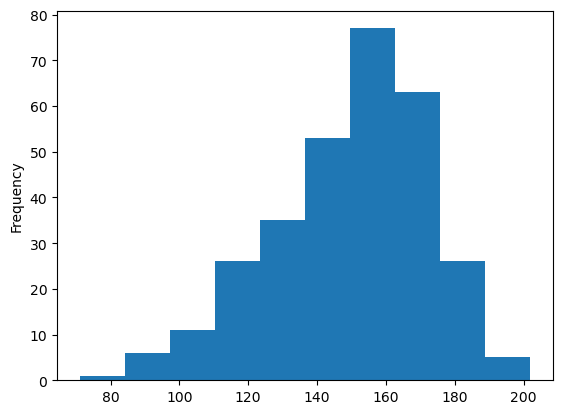

In [17]:
data.thalach.plot.hist()

<Axes: ylabel='Frequency'>

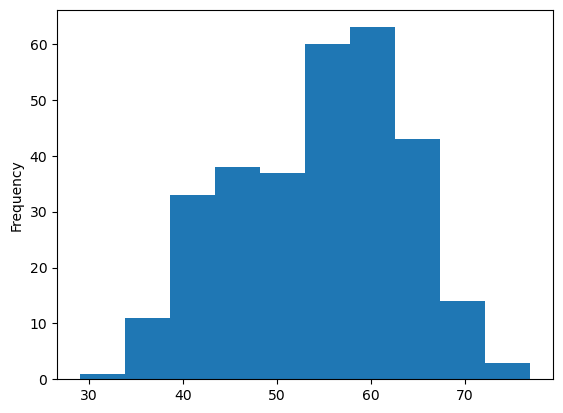

In [18]:
data.age.plot.hist()

Mostly all the columns have near to normal distribution. 

In [19]:
## Let's see how heart disease is related with frequency of chest pain  
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


- **cp** – Chest pain type  
  - `0`: Typical angina – chest pain related to decreased blood supply to the heart  
  - `1`: Atypical angina – chest pain not related to the heart  
  - `2`: Non-anginal pain – typically esophageal spasms (non-heart related)  
  - `3`: Asymptomatic – chest pain not showing signs of disease  

So from the cross tab result we can see that, there are 4 types of Chest pains which related to the people who have heart disease or not.


- Let's make the cross tab more visual,

Text(0, 0.5, 'Amount')

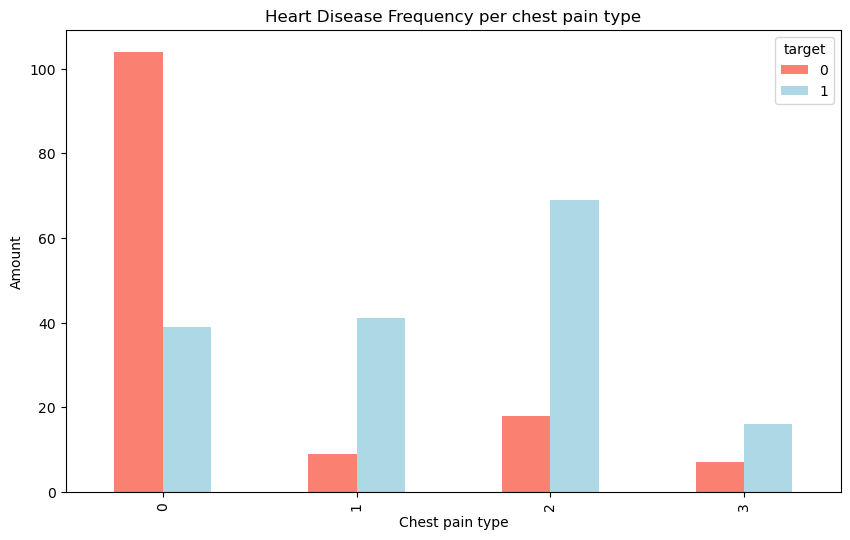

In [20]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")

In [21]:
## Now let's check the correlation of the variables with each other.
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


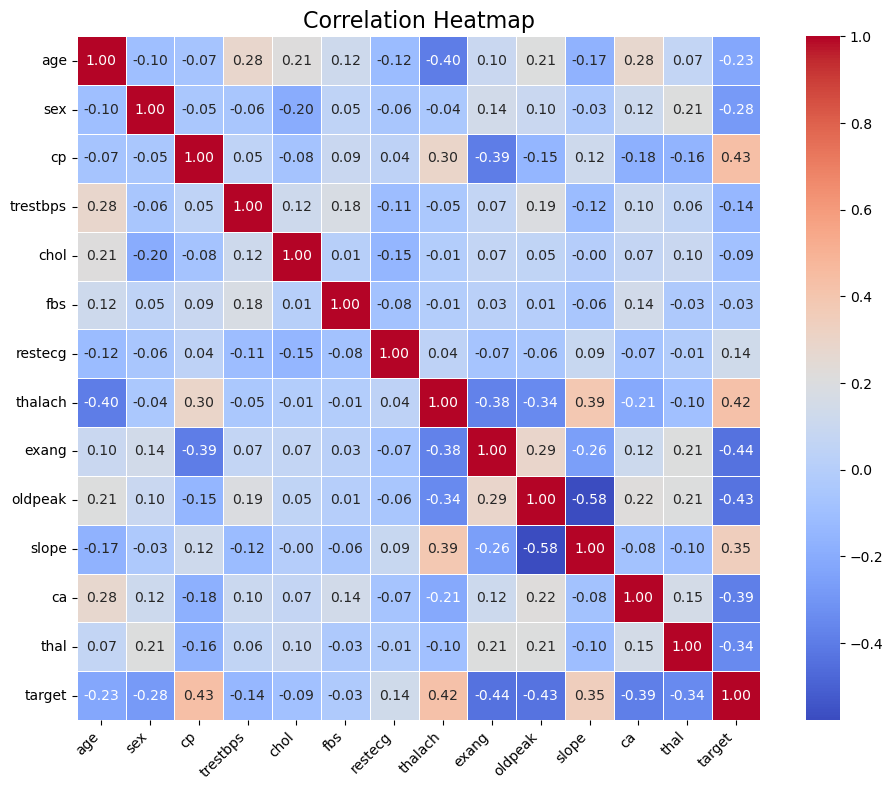

In [22]:
## Lets make it more visual with Seaborn's heatmap 

import seaborn as sns


# Compute correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap with enhancements
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm",           # Choose a visually clear color map
    cbar=True,
    square=True,
    annot_kws={"size": 10}
)

# Title and axis formatting
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


- From The Correaltion matrix we can say that all the variable with target feature are somewhere strongly related, either positively or negatively, except chol, and fbs.
- In the final model, I will consider only those variables which are greater than -50% and less than +50% correlated with the target feature. This is because such variables have a weaker correlation with the target, which helps reduce multicollinearity and makes the model more stable and generalizable.

## Modelling

## Let's prepare our data for Machine learning

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = data.drop("target", axis=True)
Y = data.target

In [25]:
## Let's split the data into train and test set
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=(0.2))

In [26]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(242, 61, 242, 61)

## We will try 3 different models here.
-- Logistic regression
-- KNN classifier
-- Randownforest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models  = {"Logistic Regression": LogisticRegression(),
           "KNN Classifier": KNeighborsClassifier(),
           "Random Forest Classifier": RandomForestClassifier()
}

def modelling(models, X_train, X_test, Y_train, Y_test):
    ## Set random seed
    np.random.seed(42)
    
    ## create a dictionary to store the model scores.
    model_scores = {}
    
    ## Let's loops through the different model to train and evaluate 
    for name, model in models.items():
        ## fit the model
        model.fit(X_train, Y_train)
        
        ## Evaluate the model
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores

In [28]:
scores = modelling(models, X_train, X_test, Y_train, Y_test)
scores

d:\CLG\AI\UDEMY\AI-ML\sample_project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

<Axes: >

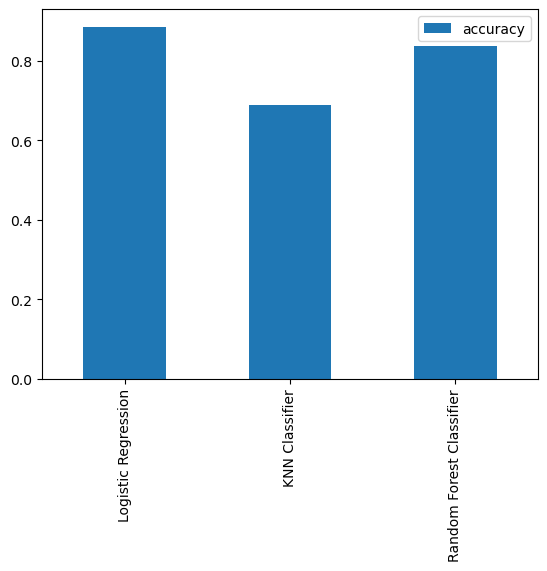

In [29]:
## Lets comapare each model in bar graph
compare = pd.DataFrame(scores, index=["accuracy"])
compare.T.plot.bar()

## So now lets try to improve our baseline models with hyper parameter tunning and based on feature importance.
## We will also look at:- 
- Confusion matrix
- Cross validation matrix
- Confusion matrix
- Precision
- F1
- Recall
- Classification report
- ROC Curve
- Area under the curve 

In [30]:
train_scores = []
test_scores = []

knn = KNeighborsClassifier()

## Let's loop throuhgh different N neighbours.

for i in range(1, 21):
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))
    

In [31]:
len(train_scores), len(test_scores)

(20, 20)

Max KNN score on the test data: 0.7540983606557377


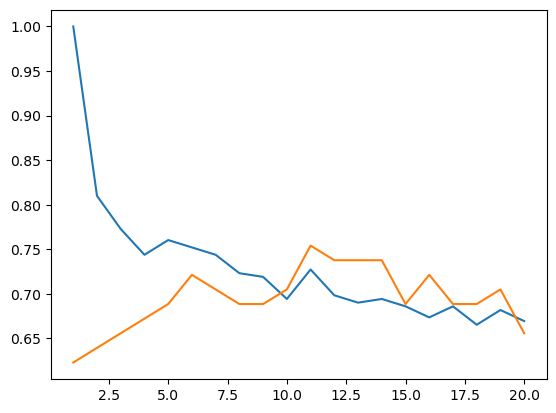

In [32]:
plt.plot(range(1, 21), train_scores, label="Train Scores")
plt.plot(range(1, 21), test_scores, label="Test Scores")
print("Max KNN score on the test data:", max(test_scores) )


from the graph we can say that at around setting n_neigbors = 11 we can get the test accuracy increased at 75 from 68.

In [33]:
## Let's try RandomizedSearchCV to optimize our models, 
# because there are a lot of other parameter we can tune and we cant always try to use for loop for each parameter tunning. 

## Hyperparameter grid for logistic regression
log_grid = {"C": np.logspace(-4,4,20),
            "solver": ["liblinear"]}

## Hyperparameter grid for RandomforestClassifier
rfc_grid = {"n_estimators": np.arange(10,1000,50),
            "max_depth": [None, 3,5,10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)
    
}



In [34]:
## Randomizes search for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
rs_log = RandomizedSearchCV(LogisticRegression(), param_distributions=log_grid, cv=5, n_iter=20, verbose=True)
rs_log.fit(X_train, Y_train)
rs_log.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [35]:
rs_log.score(X_test, Y_test)


0.8852459016393442

In [36]:
## Randomizes search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_grid, cv=5, n_iter=20, verbose=True)
rs_rfc.fit(X_train, Y_train)
rs_rfc.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(11),
 'max_depth': 3}

In [37]:
round(rs_rfc.score(X_test, Y_test),4)

0.8689

In [38]:
## Let's try GridSearchCV to optimize our models more.
from sklearn.model_selection import GridSearchCV

gs_log = GridSearchCV(LogisticRegression(), param_grid=log_grid, verbose= True, cv = 5)
gs_log.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log.score(X_test, Y_test)

0.8852459016393442

In [40]:
# ## Hyperparameter grid for RandomforestClassifier
# rfc_grid = {"n_estimators": [100,200,300,400,500,510,1000],
#             "max_depth": [5,10],
#             "min_samples_split": np.arange(2,6,2),
#             "min_samples_leaf":np.arange(8,16,2)
    
# }


# gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rfc_grid, verbose= True, cv = 5)
# gs_rf.fit(X_train, Y_train)

In [41]:
# gs_rf.score(X_test, Y_test)

So at the end logistic regression model is the best after trying different params with grid search for different models.


In [42]:
y_preds = gs_log.predict(X_test)

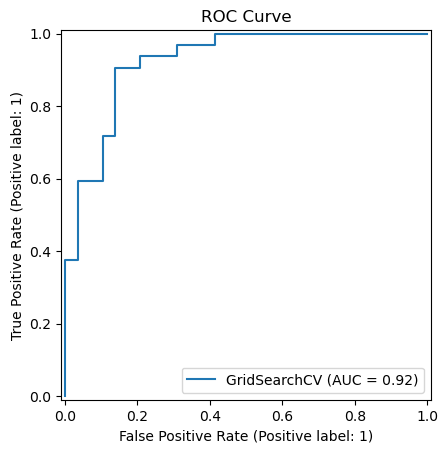

In [43]:
## Now let try check different metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

# Plot ROC Curve directly from the estimator
RocCurveDisplay.from_estimator(gs_log, X_test, Y_test)


plt.title("ROC Curve")
plt.show()


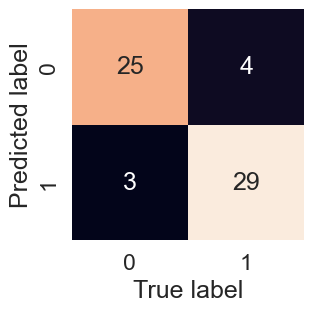

In [44]:
## Confusion metrics
sns.set(font_scale=1.5) 
def plot_conf_mat(Y_test, Y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(Y_test, y_preds)


In [45]:
## Classification Report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Let's create a new logistic regression model with parameters that we got from grid search

In [46]:
gs_log.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [47]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [48]:
## Cross Validation Accuracy
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring="accuracy" )
np.mean(cv_acc)

np.float64(0.8479781420765027)

In [49]:
## Cross Validation Precision
cv_prec = cross_val_score(clf, X, Y, cv=5, scoring="precision" )
np.mean(cv_prec)

np.float64(0.8215873015873015)

In [50]:
## Cross Validation Recall
cv_rec = cross_val_score(clf, X, Y, cv=5, scoring="recall" )
np.mean(cv_rec)

np.float64(0.9272727272727274)

In [51]:
## Cross Validation F1
cv_f1 = cross_val_score(clf, X, Y, cv=5, scoring="f1" )
np.mean(cv_f1)

np.float64(0.8705403543192143)

In [52]:
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                           "Precision": np.mean(cv_prec),
                           "Recall":np.mean(cv_rec),
                           "F1": np.mean(cv_f1)}, index=[0])

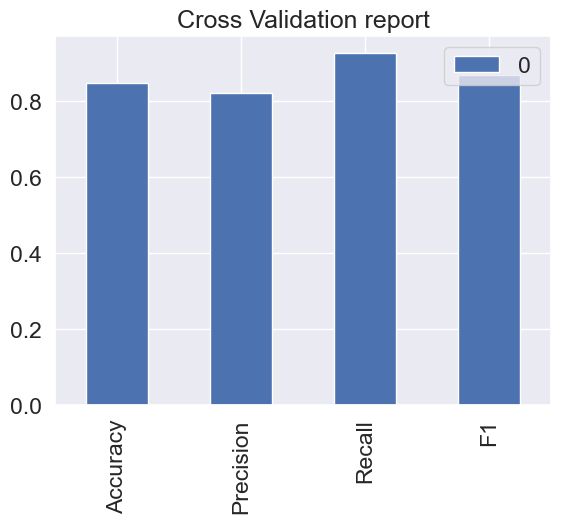

In [53]:
cv_metrics.T.plot.bar(title="Cross Validation report", legend=True);

## Feature Importance
- Let's see what features are important or how much important the features are in the logistic regression model.


In [54]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, Y_train)
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [71]:
## Lets match coefficients to their appropriate coloumns
feature_dict_coef = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict_coef

{'age': np.float64(0.003699223396114675),
 'sex': np.float64(-0.9042409779785583),
 'cp': np.float64(0.6747282348693419),
 'trestbps': np.float64(-0.011613398123390507),
 'chol': np.float64(-0.0017036431858934173),
 'fbs': np.float64(0.0478768694057663),
 'restecg': np.float64(0.33490207838133623),
 'thalach': np.float64(0.024729380915946855),
 'exang': np.float64(-0.6312041363430085),
 'oldpeak': np.float64(-0.5759099636629296),
 'slope': np.float64(0.47095166489539353),
 'ca': np.float64(-0.6516534354909507),
 'thal': np.float64(-0.6998421698316164)}

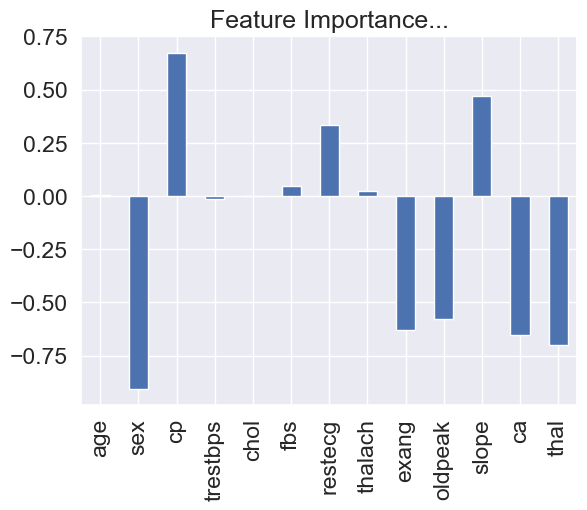

In [64]:
feature_df = pd.DataFrame(feature_dict_coef, index=[0])
feature_df.T.plot.bar(title="Feature Importance...", legend=False);

From the bar graph we can say there are so many features like age, trestbps, chol, thalach etc, who contribute almost no information to the final model.

Lets compare this coefficients with correlation matrix

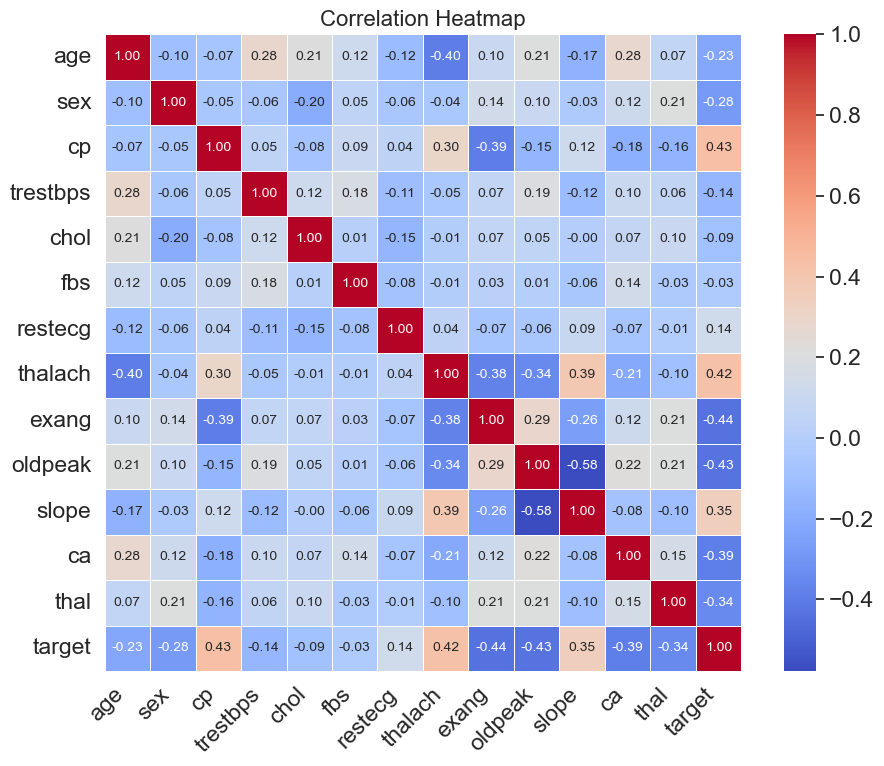

In [56]:
# Compute correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap with enhancements
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm",           # Choose a visually clear color map
    cbar=True,
    square=True,
    annot_kws={"size": 10}
)

# Title and axis formatting
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [65]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


- so from the cross tab we can see that sex ratio increases for one particular type,
the less heart disease it shows and also that what it indicated in the final coefficients

- **slope** – Slope of the peak exercise ST segment  
  - `0`: Upsloping – better heart rate with exercise (uncommon)  
  - `1`: Flat – minimal change (typical of a healthy heart)  
  - `2`: Downsloping – signs of an unhealthy heart 

In [70]:
pd.crosstab(data.slope, data.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


- from the coefficient matrics it shows that it is possitively related to the target coloumn and similarly from the cross tab result we can say that 
as the slop value of one particular type increases the target value also increases.

There are many features which are not really influencing the final model. so maybe for the future we will not consider it to be collected for the studies.
overall we got really good final model with over 89% of accuracy.

In [ ]:
# Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')
clf.fit(X_train, Y_train)

LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')

In [77]:
clf.score(X_test, Y_test)

0.8852459016393442